# AI-enabled Internet of Things Tugas 2

## Import Library

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Membaca Dataset Hasil Rekaman Phyphox

In [291]:
df = pd.read_excel("dataset/dataset.xls")
df.rename(columns={
    'Time (s)':'Time',
    'Linear Acceleration x (m/s^2)':'SumbuX',
    'Linear Acceleration y (m/s^2)':'SumbuY',
    'Linear Acceleration z (m/s^2)':'SumbuZ'
    }, inplace=True)

In [292]:
df = df[1400:-100]

In [293]:
df.head()

,Time,SumbuX,SumbuY,SumbuZ
1400,13.684970,-0.000708,-0.000607,-0.031331
1401,13.694657,0.006350,-0.008654,-0.038335
1402,13.704345,0.006350,-0.008654,-0.038335
1403,13.714031,-0.005601,-0.005668,-0.040338
1404,13.723717,-0.005601,-0.005668,-0.040338


## Plot data

In [294]:
# me-nol-kan sinyal pada sumbu Y sehingga semua sinyal mempunyai starting point sumbu Y yang sama
df['SumbuZ'] = df['SumbuZ'] - (df['SumbuZ'].sum() / len(df['SumbuZ']))
df['SumbuY'] = df['SumbuY'] - (df['SumbuY'].sum() / len(df['SumbuY']))
df['SumbuX'] = df['SumbuX'] - (df['SumbuX'].sum() / len(df['SumbuX']))

In [295]:
def makePlot(df, labelX="Waktu (s)", labelY="Akselerasi (m/s^2)"):
    _, axs = plt.subplots(1, 3, figsize=(20,5))
    axs[0].set_title('Sumbu X')
    axs[0].plot(df['Time'], df['SumbuX'], color='red')
    axs[1].set_title('Sumbu Y')
    axs[1].plot(df['Time'], df['SumbuY'],color='green')
    axs[2].set_title('Sumbu Z')
    axs[2].plot(df['Time'], df['SumbuZ'], color='blue')

    for ax in axs.flat:
        ax.set(xlabel=labelX, ylabel=labelY)

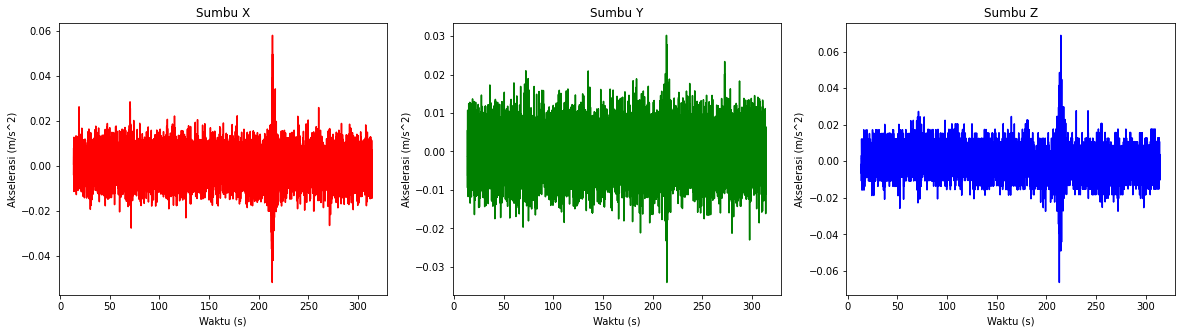

In [296]:
makePlot(df)

In [297]:
df.describe()

,Time,SumbuX,SumbuY,SumbuZ
count,31018.000000,3.101800e+04,3.101800e+04,3.101800e+04
mean,163.917742,4.867829e-19,3.078186e-19,-1.603520e-18
std,86.742710,6.442815e-03,5.537714e-03,7.083010e-03
min,13.684970,-5.168889e-02,-3.407844e-02,-6.633054e-02
25%,88.799588,-4.198636e-03,-3.699439e-03,-3.734535e-03
50%,163.916444,-3.688588e-05,-4.043916e-05,1.129463e-03
75%,239.035279,4.246114e-03,3.749561e-03,3.768212e-03
max,314.155635,5.795411e-02,3.018056e-02,6.887246e-02


## Analisis

### FFT

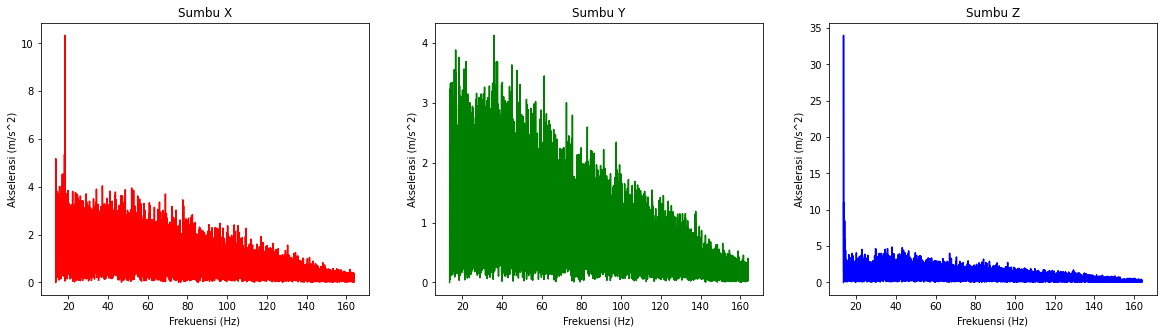

In [298]:
N = df.shape[0]
MID = N//2

x = fft(df['SumbuX'].to_numpy())
y = fft(df['SumbuY'].to_numpy())
z = fft(df['SumbuZ'].to_numpy())
t = df['Time'][:MID].to_list()

zipped = list(zip(t,np.abs(x),np.abs(y),np.abs(z)))

df_FFT = pd.DataFrame(zipped, columns=['Time','SumbuX','SumbuY','SumbuZ'])
makePlot(df_FFT, "Frekuensi (Hz)")

### Filtering

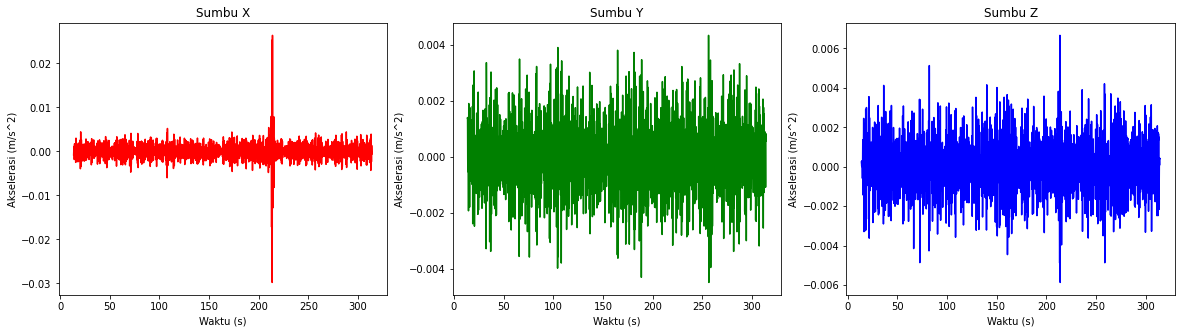

In [299]:
fs = 240.0
lowcut = 2.0
highcut = 5.0
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq
order = 2
b, a = butter(order, [low, high], 'bandpass', analog=False)
x = filtfilt(b, a, df['SumbuX'], axis=0)
y = filtfilt(b, a, df['SumbuY'], axis=0)
z = filtfilt(b, a, df['SumbuZ'], axis=0)
t = df['Time']

zipped = list(zip(t,x,y,z))

df_filter = pd.DataFrame(zipped, columns=['Time','SumbuX','SumbuY','SumbuZ'])
makePlot(df_filter)

### FFT setelah filtering

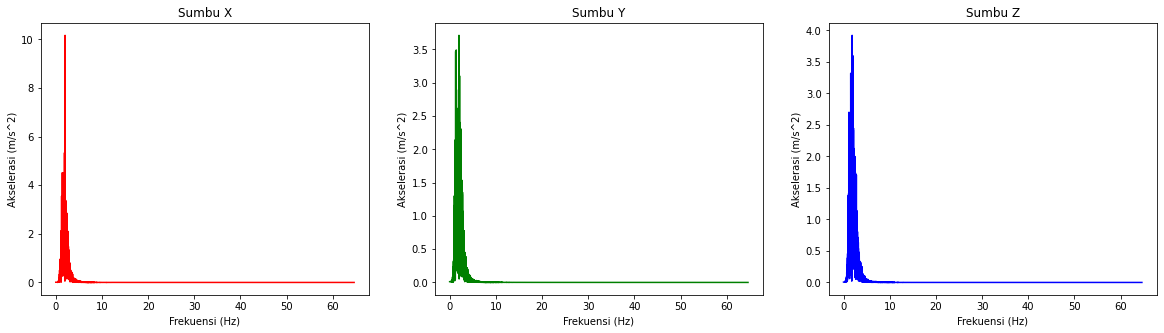

In [300]:
N = df_filter.shape[0]
freq = N/240
MID = N//2

x = fft(df_filter['SumbuX'].to_numpy())
y = fft(df_filter['SumbuY'].to_numpy())
z = fft(df_filter['SumbuZ'].to_numpy())
t = fftfreq(N, 1 / freq)[:MID]

zipped = list(zip(t,np.abs(x),np.abs(y),np.abs(z)))

df_FFT_filter = pd.DataFrame(zipped, columns=['Time','SumbuX','SumbuY','SumbuZ'])
makePlot(df_FFT_filter, "Frekuensi (Hz)")

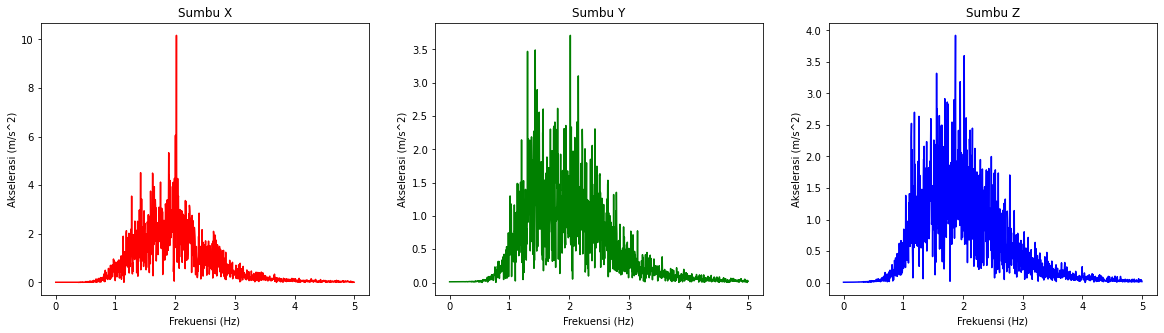

In [301]:
makePlot(df_FFT_filter[0:1200], "Frekuensi (Hz)")

In [302]:
df_kendaraan = pd.read_excel("dataset/kendaraan.xls")
df_kendaraan.rename(columns={
    'Time (s)':'Time',
    'Kendaraan':'Kendaraan'
    }, inplace=True)
df_kendaraan['marker'] = np.zeros(len(df_kendaraan))

In [303]:
df_kendaraan.head()

,Time,Kendaraan,marker
0,22,Motor,0.0
1,63,Truk,0.0
2,89,Motor,0.0
3,98,Motor,0.0
4,99,Motor,0.0


In [304]:
motor = df_kendaraan[df_kendaraan['Kendaraan'] == 'Motor']
mobil = df_kendaraan[df_kendaraan['Kendaraan'] == 'Mobil']
truk = df_kendaraan[df_kendaraan['Kendaraan'] == 'Truk']

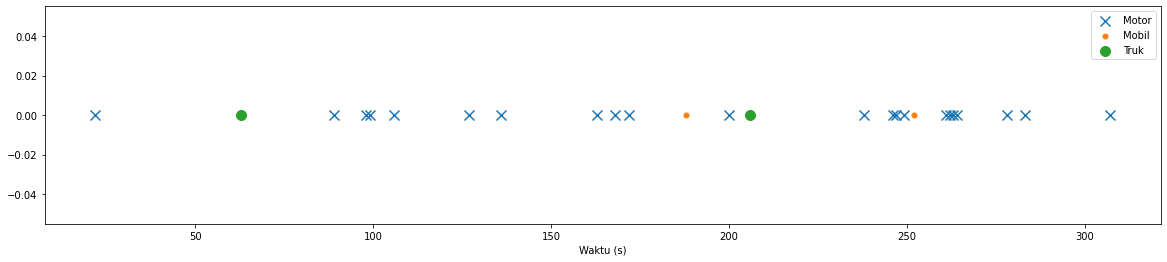

In [305]:
plt.figure(figsize=(20,4))
plt.scatter(x=motor['Time'], y=motor['marker'], marker='x', s=100)
plt.scatter(x=mobil['Time'], y=mobil['marker'], marker='.', s=100)
plt.scatter(x=truk['Time'], y=truk['marker'], marker='o', s=100)
plt.legend(['Motor', 'Mobil', 'Truk'])
plt.xlabel('Waktu (s)')
plt.show()

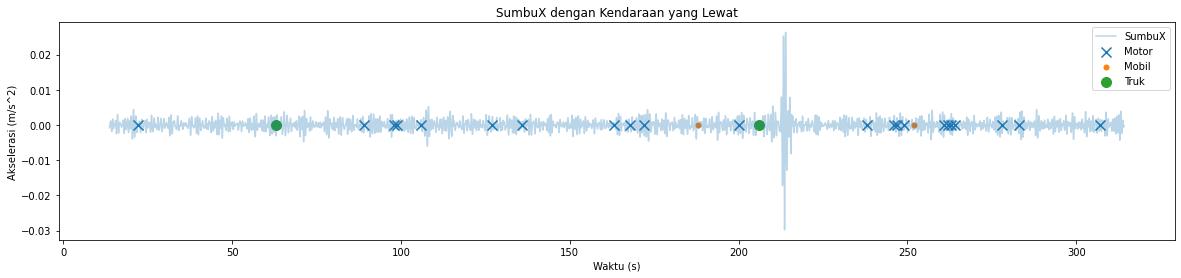

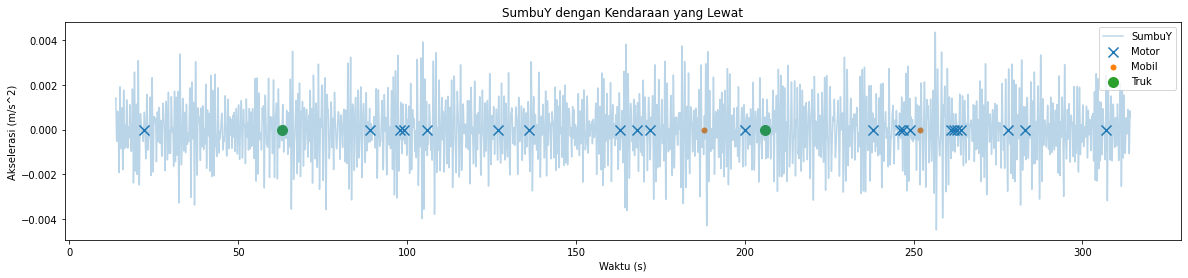

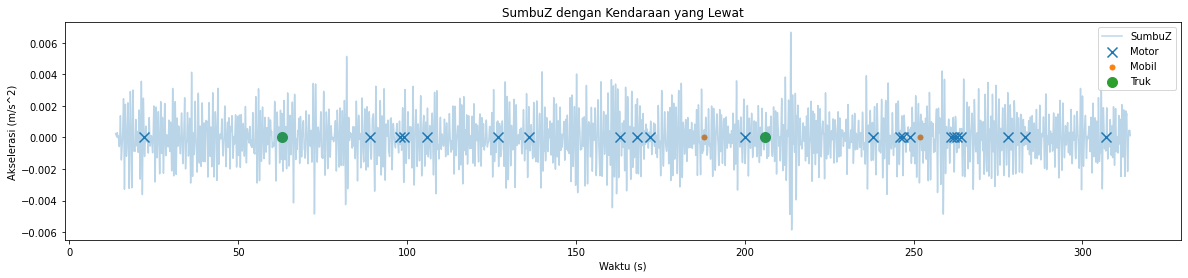

In [306]:
column = ["SumbuX","SumbuY", "SumbuZ"]
for i in column:
    df_filter[[i, 'Time']].plot(x='Time', alpha=0.3, figsize=(20,4))
    plt.scatter(x=motor['Time'], y=motor['marker'], marker='x', s=100, label='Motor')
    plt.scatter(x=mobil['Time'], y=mobil['marker'], marker='.', s=100, label='Mobil')
    plt.scatter(x=truk['Time'], y=truk['marker'], marker='o', s=100, label='Truk')
    plt.legend(loc='upper right')
    plt.title(f'{i} dengan Kendaraan yang Lewat')
    plt.xlabel("Waktu (s)")
    plt.ylabel("Akselerasi (m/s^2)")
    plt.show()

## Heatmap

<AxesSubplot:>

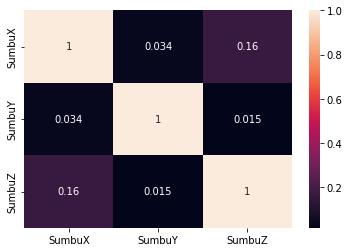

In [315]:
sns.heatmap(df_filter[['SumbuX', 'SumbuY', 'SumbuZ']].abs().corr(), annot=True)

In [312]:
df_fuzzy = df_filter[['Time', 'SumbuX', 'SumbuZ']]
df_fuzzy['SumbuX'] = df_filter['SumbuX'].apply(lambda x: abs(x*10000))
df_fuzzy['SumbuZ'] = df_filter['SumbuZ'].apply(lambda x: abs(x*10000))
df_fuzzy.describe()

,Time,SumbuX,SumbuZ
count,31018.000000,31018.000000,31018.000000
mean,163.917742,11.878271,10.212686
std,86.742710,14.353365,8.055178
min,13.684970,0.000250,0.000151
25%,88.799588,4.367872,3.964314
50%,163.916444,9.113757,8.458156
75%,239.035279,16.195401,14.553877
max,314.155635,297.889811,66.599674


In [313]:
df_fuzzy.head()

,Time,SumbuX,SumbuZ
0,13.684970,7.896497,2.471747
1,13.694657,7.171460,2.349973
2,13.704345,6.408231,2.208906
3,13.714031,5.619688,2.062856
4,13.723717,4.817339,1.923096


In [381]:
class FuzzyLogic():
    def __init__(self, config):
        self.df = []
        self.keanggotaan = config['keanggotaan']
        self.fuzzied = []
        self.rules = {}
        self.inferenced = []
        self.results = []
        self.rules = config['rules']
        self.deffuzy = config['deffuzy']

    def GenerateFuzzy(self):
        data = self.keanggotaan
        keanggotaan = {}
        for i in data:
            keanggotaan[i] = {}
            for j in data[i]:
                k = list(j.keys())[0]
                keanggotaan[i][k] = 0
        return keanggotaan

    def ReadData(self, loc):
        self.df = pd.read_excel(loc)

    def SetData(self, df):
        self.df = df

    def Fuzzification(self, anggota, x):
        keAnggotaan = self.GenerateFuzzy()
        for j, data in enumerate(keAnggotaan[anggota].keys()):
            b, c = self.keanggotaan[anggota][j][data]
            a, d = b - 1, c + 1
            if b <= x <= c:
                keAnggotaan[anggota][data] = 1
            elif a < x < b:
                keAnggotaan[anggota][data] = (x-a)/(b-a)
            elif c < x <= d:
                keAnggotaan[anggota][data] = (d-x)/(d-c)
        return keAnggotaan[anggota]

    def FuzzyDataset(self):
        for i in range(len(self.df)):
            fuzzed = {}
            for j in self.keanggotaan:
                fuzzed[j] = self.Fuzzification(j, self.df[j][i])
            self.fuzzied.append(fuzzed)

    def Inference(self):
        for fuzzed in self.fuzzied:
            result = {}
            keys = []
            for i in self.rules:
                keys.append(i)
                result[self.rules[i]] = 0
            for key in keys:
                output = self.rules[key]
                minVal = fuzzed[list(fuzzed.keys())[0]][key[0]]
                for j, val in enumerate(fuzzed):
                    minVal = min(minVal, fuzzed[val][key[j]])
                result[output] = max(minVal, result[output])
            self.inferenced.append(result)

    def Defuzzification(self):
        for i in self.inferenced:
            atas, bawah = 0, 0
            for output in self.deffuzy.keys():
                atas += i[output] * self.deffuzy[output]
                bawah += i[output]
            if bawah == 0:
                self.results.append(0)
            else:
                self.results.append(atas/bawah)
        self.df['result'] = self.results

    def GetData(self):
        return self.df

In [387]:
config = {
    'keanggotaan': {
        'SumbuX': [{'sangat rendah': [1, 2]}, {'rendah': [3, 4]}, {'sedang': [5, 6]}, {'tinggi': [7, 10]}],
        'SumbuZ': [{'sangat rendah': [1, 9]}, {'rendah': [10, 25]}, {'sedang': [26, 30]}, {'tinggi': [31, 50]}]
    },
    'rules': {
        ('sangat rendah', 'sangat rendah'): 'tidak diketahui',
        ('sangat rendah', 'rendah'): 'tidak diketahui',
        ('sangat rendah', 'sedang'): 'tidak diketahui',
        ('sangat rendah', 'tinggi'): 'tidak diketahui',
        ('rendah', 'tinggi'): 'mobil',
        ('rendah', 'sedang'): 'mobil',
        ('rendah', 'rendah'): 'motor',
        ('rendah', 'sangat rendah'): 'tidak diketahui',
        ('sedang', 'tinggi'): 'truk',
        ('sedang', 'sedang'): 'mobil',
        ('sedang', 'rendah'): 'motor',
        ('sedang', 'sangat rendah'): 'tidak diketahui',
        ('tinggi', 'tinggi'): 'tidak diketahui',
        ('tinggi', 'sedang'): 'mobil',
        ('tinggi', 'rendah'): 'mobil',
        ('tinggi', 'sangat rendah'): 'tidak diketahui',
    },
    'deffuzy': {'tidak diketahui': 0, 'motor': 50, "mobil": 75, "truk": 100}
}
fl = FuzzyLogic(config)
fl.SetData(df_fuzzy)
fl.FuzzyDataset()
fl.Inference()
fl.Defuzzification()

In [388]:
fuzzy = fl.GetData()

In [395]:
klasifikasi = []

for i in range(len(fuzzy)):
  if fuzzy['result'][i] == 100:
    klasifikasi.append('truk')
  elif fuzzy['result'][i] >= 75 and fuzzy['result'][i] <= 80:
    klasifikasi.append('mobil')
  elif fuzzy['result'][i] >= 50 and fuzzy['result'][i] <= 70:
    klasifikasi.append('motor')
  else:
    klasifikasi.append('tidak diketahui')

In [397]:
df_filter['klasifikasi'] = klasifikasi
df_filter.groupby('klasifikasi')['Time'].count()

klasifikasi
mobil               2407
motor               2396
tidak diketahui    26170
truk                  45
Name: Time, dtype: int64